## Regression via CART using auto dataset

In [48]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree            import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn                 import datasets
from sklearn.metrics         import mean_squared_error as MSE
from sklearn.ensemble        import RandomForestRegressor, GradientBoostingRegressor

### Load Data
Info can be shown via `dataset.keys()` and `dataset.DESCR`

In [13]:
dataset = datasets.load_boston()
X_numpy = dataset.data
y_numpy = dataset.target
y_numpy = np.expand_dims(y_numpy, axis = 1)
data_np = np.concatenate((X_numpy, y_numpy), axis = 1)

columns_names = list(dataset.feature_names)
columns_names.append('MEDV') # append targed varible in dataset

data_pd = pd.DataFrame(data = data_np, columns = columns_names)
data_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
X    = data_pd.drop('MEDV', axis = 1)
y    = data_pd['MEDV']
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Construct Random Forest
- Base estimator: Decision Tree;
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees $d$ features are sampled at each node without replacement ( $d$ < total number of features )

In [34]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators = 25, random_state = 42)
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [35]:
# Predict the test set labels
y_pred = rf.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**0.5
# Print rmse_test
print('o Test set RMSE of rf: {:.2f}'.format(rmse_test))

o Test set RMSE of rf: 2.81


### Feature Importance with Random Forest

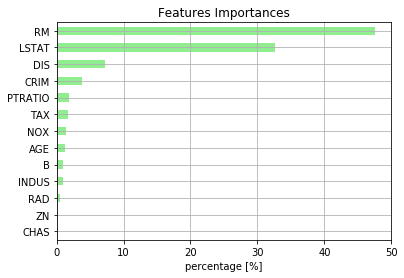

In [36]:
# Create a pd.Series of features importances
importances = pd.Series(data  = rf.feature_importances_,
                        index = X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()
importances_sorted = importances_sorted.map(lambda x: round(x*100, 3)) 

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.xlabel('percentage [%]')
plt.grid()
plt.show()

### Gradient Boosting (GB)
- Sequential correction of predecessor's errors.
- Does not tweak the weights of training instances.
- Fit each predictor is trained using its predecessor's residual errors as labels.
- Gradient Boosted Trees: a CART is used as a base learner.

In [39]:
# Instantiate gb
gb = GradientBoostingRegressor(max_depth = 4, n_estimators = 200, random_state = 42)
# Fit gb to the training set
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
# Predict test set labels
y_pred = gb.predict(X_test)
# Compute MSE
mse_test = MSE(y_test, y_pred)
# Compute RMSE
rmse_test = mse_test**0.5
# Print RMSE
print('o Test set RMSE of gb: {:.3f}'.format(rmse_test))

o Test set RMSE of gb: 2.446


### Stochastic Gradient Boosting 
- GB involves an exaustive search procedure.
- Each CART is trained to find the best split points and features whch may lead to CARTs using the same split points and maybe the same features.
- In Stochastic Gradient Boosting (SGB) each tree is trained on a random subset of rows of the training data. The sampled instances (40%-80% of the training set) are sampled without replacement. Features are sampled (without replacement) when choosing split points.
- **Result**: further ensemble diversity.
- **Effect**: adding further variance to the ensemble of trees.

In [45]:
# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth    = 4, 
                                 subsample    = 0.9, 
                                 max_features = 0.75, 
                                 n_estimators = 200,                           
                                 random_state = 2)
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)
# Predict test set labels
y_pred = sgbr.predict(X_test)

In [46]:
# Compute test set MSE
mse_test = MSE(y_test, y_pred)
# Compute test set RMSE
rmse_test = mse_test**0.5
# Print rmse_test
print('o Test set RMSE of sgbr: {:.2f}'.format(rmse_test))

o Test set RMSE of sgbr: 2.54


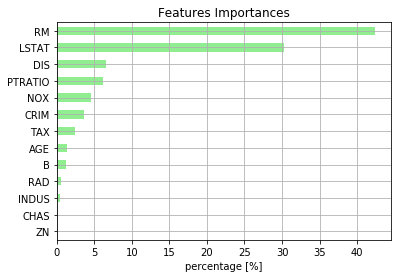

In [56]:
# Create a pd.Series of features importances
importances = pd.Series(data  = sgbr.feature_importances_,
                        index = X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()
importances_sorted = importances_sorted.map(lambda x: round(x*100, 3)) 

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.xlabel('percentage [%]')
plt.grid()
plt.show()

### Tuning Random Forest with GridSeachCV

In [51]:
# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state = 42, oob_score = True, n_jobs = -1)
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [52]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators' : [100, 350, 500],
             'max_features' : ['log2', 'auto', 'sqrt'],
             'min_samples_leaf' : [2,10,30]
}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [53]:
# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   10.1s finished
C:\Users\giann\Anaconda3\envs\data-science\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 350, 500], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [54]:
# Extract the best estimator
best_model = grid_rf.best_estimator_
best_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [55]:
# Compute rmse for test set
y_pred    = best_model.predict(X_test)
rmse_test = MSE(y_pred, y_test)**(1/2)
# Print rmse_test
print('o Test RMSE of best model: {:.3f}'.format(rmse_test)) 

o Test RMSE of best model: 3.234
